In [ ]:
#pip install keras
!pip install tensorflow

  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

from sklearn.preprocessing import MinMaxScaler

from keras.models import load_model
#from attention import Attention

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

import tkinter as tk
from tkinter import filedialog

In [ ]:
# Convert an array of values into a dataset matrix
def create_dataset(dataset, Window_Size):
  dataX, dataY = [], []
  for i in range(len(dataset) - Window_Size):
    dataX.append(dataset[i : (i + Window_Size), 0])
    dataY.append(dataset[i + Window_Size, 0])
  return np.array(dataX), np.array(dataY)

In [ ]:
def plot_result(Y_Test, Y_Pred):
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    ax.plot(Y_Test, label='Actual Bitcoin Price')
    ax.plot(Y_Pred, label='Predicted Bitcoin Price')
    ax.set_xlabel('Time Interval')
    ax.set_ylabel('Bitcoin Price')
    ax.legend()

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

In [ ]:
tt = []
ws = 5
hour = 1
u = 32

print('You must give more than', ws+hour ,'Prices as Input')

x = int(input('How many prices you want to input?'))

if(x>(ws+hour)):
    print('Enter the prices')
    print('')
    for i in range(0,x):
        val = float(input())
        tt.append(val)

You must give more than 6 Prices as Input
How many prices you want to input?7
Enter the prices

1
2
3
4
5
6
7


In [ ]:
tt = np.array(tt)
tt

array([1., 2., 3., 4., 5., 6., 7.])

In [ ]:
column_values = ['close']
  
# creating the dataframe
test = pd.DataFrame(data = tt, 
                  columns = column_values)

test.to_csv("C:/Thesis_Test/test_data.csv",index=False)

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
global x_test, y_test

In [ ]:
def preprocess(df):
    test_prices = pd.to_numeric(df['close'], errors='coerce').values.reshape(-1,1)

    
    model_test_input=scaler.fit_transform(df['close'].values.reshape(-1,1))
    
    return model_test_input


(2, 5, 1)
(2, 1)
1/1 [==============================] - 1s 1s/step

Window Size: 5; LSTM units: 32

Test data RMSE: 2.1167711332529136			Test data MSE: 4.480720030572824
Test data MAE: 2.1167689561843868			Test data MAPE: 32.75590538978576
_____________________________________
Time series analysis completed


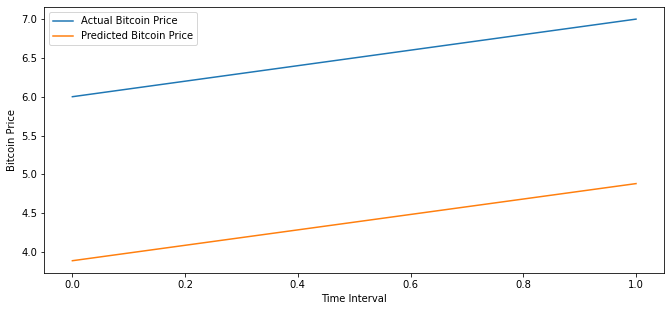

In [ ]:
def load_data():
    
    global x_test, y_test
    
    file_path = filedialog.askopenfilename()
    # perform data loading and processing here
    print()
    
    rr= f"Data loaded from: {file_path}"
    
    load_label = tk.Label(root, text=rr)
    load_label.pack()
    
    testdf = pd.read_csv(file_path)
    
    test_input = preprocess(testdf)
    
    x_test, y_test=create_dataset(dataset=test_input, Window_Size=ws)
    
    r2= f"X_test shape = {x_test.shape}"
    r3= f"y_test shape = {y_test.shape}"
    
    load_label2 = tk.Label(root, text=r2)
    load_label3 = tk.Label(root, text=r3)
    
    load_label2.pack()
    load_label3.pack()
    
    

def run_analysis():
    
    global x_test, y_test
    
    x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)
    print(x_test.shape)
    y_test = y_test.reshape(-1,1)
    y_test = scaler.inverse_transform(y_test)
    print(y_test.shape)
    #print(y_test)
    
    model = load_model(f'C:/Thesis_Test/CNN_LSTM_MaxPool_Model_WS{ws}_Units{u}.h5')
    
    y_pred = model.predict(x_test)
    y_pred = scaler.inverse_transform(y_pred)
    
    RMSE = math.sqrt(mean_squared_error(y_test,y_pred))
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)*100
    
    ra = ""
    ra2 = f"Window Size: {ws}; LSTM units: {u}"
    ra3 = ""
    ra4 = f"Test data RMSE: {RMSE}\t\t\tTest data MSE: {MSE}"
    ra5 = f"Test data MAE: {MAE}\t\t\tTest data MAPE: {MAPE}"
    
    print(ra)
    print(ra2)
    print(ra3)
    print(ra4)
    print(ra5)
    print("_____________________________________")
    
    load_label4 = tk.Label(root, text=ra)
    load_label5 = tk.Label(root, text=ra2)
    load_label6 = tk.Label(root, text=ra3)
    load_label7 = tk.Label(root, text=ra4)
    load_label8 = tk.Label(root, text=ra5)
    
    load_label4.pack()
    load_label5.pack()
    
    load_label6.pack()
    load_label7.pack()
    
    load_label8.pack()
    
    plot_result(y_test, y_pred)
    
    # perform time series analysis here
    print("Time series analysis completed")
    


root = tk.Tk()
root.title("Time Series Analysis")

# Set the background color of the window to black
#root.config(bg='DarkOliveGreen')
root.geometry("800x600+100+50")

button_width = 10
button_height = 1

load_data_button = tk.Button(root, text="Load Data", command=load_data, width=button_width, height=button_height)
load_data_button.pack(pady=7)

run_analysis_button = tk.Button(root, text="Run Analysis", command=run_analysis, width=button_width, height=button_height)
run_analysis_button.pack(pady=7)

root.mainloop()
